In [1]:
import networkx as nx
import os
import sys
import urllib
from IPython.display import SVG
from sklearn.cluster import KMeans
from sknetwork.embedding import Spectral
from sknetwork.hierarchy import Paris
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph, svg_dendrogram
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture

In [2]:
def get_graph(url):
    graph = nx.read_graphml(url)
    return graph

In [3]:
def normalize_graph(graph):
    new_graph = nx.Graph()
    for u, v in graph.edges():
        if new_graph.has_edge(u, v):
            new_graph[u][v]['weight'] += 1
        else:
            new_graph.add_edge(u, v, weight=1)
    return new_graph

In [4]:
def get_adj_matrix(graph):
    adj_matrix = nx.to_numpy_array(graph) # convert to adj matrix
    return adj_matrix

In [5]:
def get_embeddings(graph):
    adj_matrix = get_adj_matrix(graph)
    spectral = Spectral()
    embedding = spectral.fit_transform(adj_matrix)
    return embedding

In [6]:
def k_means(graph, clusters):
    embeddings = get_embeddings(graph)
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(embeddings)
    return kmeans

In [7]:
def paris_hierarchy(graph):
    adj_matrix = get_adj_matrix(graph)
    paris = Paris()
    dendrogram = paris.fit_transform(adj_matrix)
    return dendrogram

In [8]:
def make_paris_image(dendrogram):
    image = svg_dendrogram(dendrogram)
    return SVG(image)

In [9]:
def spectral_clustering(graph, clusters):
    adj_matrix = get_adj_matrix(graph)
    sc = SpectralClustering(clusters, affinity='precomputed', n_init=10, assign_labels='discretize')
    results = sc.fit(adj_matrix)
    return results

In [10]:
def gaussian_mixture(graph, clusters):
    embeddings - get_embeddings(graph)
    gmm = GaussianMixture(n_components=clusters).fit(embeddings)
    gmm = gmm.predict(embeddings)
    return gmm

In [11]:
cat_graph = get_graph("cat.graphml")

In [12]:
cat_graph = normalize_graph(cat_graph)

In [13]:
cat_graph

In [14]:
matrix = get_adj_matrix(cat_graph)

In [15]:
matrix

array([[0., 2., 2., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
embeddings = get_embeddings(cat_graph)

In [17]:
embeddings

array([[ 0.01759577,  0.99984518],
       [ 0.04392782,  0.99903471],
       [ 0.11714819,  0.99311444],
       [ 0.0230149 ,  0.99973512],
       [-0.01999572,  0.99980007],
       [ 0.31111042,  0.95037377],
       [ 0.00200709,  0.99999799],
       [-0.0348261 ,  0.99939339],
       [-0.39138966,  0.92022504],
       [-0.03162022,  0.99949996],
       [ 0.43081995,  0.9024379 ],
       [ 0.06091763,  0.9981428 ],
       [-0.97582449,  0.21855563],
       [ 0.21829002,  0.97588394],
       [ 0.23413891,  0.97220315],
       [-0.4424093 ,  0.89681325],
       [ 0.99630613, -0.0858725 ],
       [ 0.95972226, -0.2809505 ],
       [ 0.93553677,  0.35322933],
       [ 0.99644899,  0.08419865],
       [-0.92038943, -0.39100294],
       [-0.88414051, -0.46722109],
       [-0.03913366,  0.99923398],
       [-0.12935062, -0.99159892],
       [-0.47302361, -0.88104975],
       [-0.97633214,  0.21627657],
       [-0.9573989 , -0.28876868],
       [-0.9647786 , -0.26306321],
       [ 0.95039859,

In [18]:
k = k_means(cat_graph, 10)

In [19]:
k.labels_

array([2, 2, 2, 2, 2, 9, 2, 2, 7, 2, 9, 2, 1, 9, 9, 7, 6, 0, 6, 6, 4, 4,
       2, 5, 3, 1, 4, 4, 0, 0, 4, 4, 3, 4, 4, 8, 8, 8, 3, 3, 0, 0, 0, 0,
       0, 8, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 8, 5, 8, 8],
      dtype=int32)

In [20]:
paris = paris_hierarchy(cat_graph)

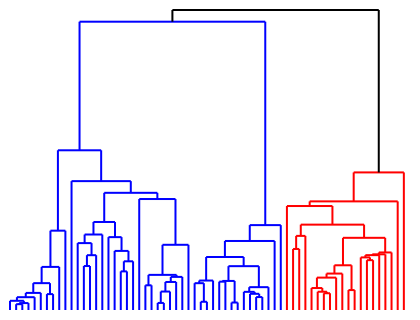

In [21]:
make_paris_image(paris)

In [22]:
spec_clust = spectral_clustering(cat_graph, 10)

In [23]:
spec_clust.labels_

array([2, 2, 7, 2, 6, 7, 2, 2, 2, 9, 7, 6, 0, 7, 7, 8, 1, 1, 1, 6, 4, 8,
       9, 1, 6, 3, 0, 3, 1, 0, 8, 8, 9, 0, 0, 4, 4, 4, 4, 8, 1, 1, 1, 1,
       1, 8, 8, 3, 3, 5, 5, 5, 1, 5, 5, 3, 3, 3, 3, 5, 5, 4, 1, 4, 4])

In [24]:
gmm = gaussian_mixture(cat_graph, 10)

In [25]:
gmm

array([1, 1, 1, 1, 1, 9, 1, 1, 8, 1, 9, 1, 4, 9, 9, 8, 5, 2, 5, 5, 3, 3,
       1, 6, 0, 4, 3, 3, 2, 2, 3, 3, 0, 3, 3, 7, 7, 7, 0, 0, 2, 2, 2, 2,
       2, 7, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 7, 6, 7, 7])